# Khipus.ai
## Convolutional Neural Network with PyTorch
### Case Study: Multi-Class image classification -Handwritten digit classification
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>

This notebook demonstrates how to build a convolutional neural network (CNN) using PyTorch to classify images from the MNIST dataset. We will cover basic tensor operations, the structure of a CNN, and the training process.

### MNIST Dataset Overview

MNIST stands for Modified National Institute of Standards and Technology. It is a widely used dataset in machine learning, particularly for training and testing image classification models.The MNIST dataset is a collection of 70,000 handwritten digits, commonly used for training various image processing systems. It is a standard benchmark in the field of machine learning and computer vision.

#### Dataset Structure

The MNIST dataset consists of:

- **Training set**: 60,000 images
- **Test set**: 10,000 images

Each image is a grayscale image of size 28x28 pixels, representing a single digit from 0 to 9.

This example is using MNIST handwritten digits.The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 255. 

In this example, each image will be converted to float32 and normalized to [0, 1].

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)


## Table of Contents
1. Import the Libraries 
2. Loading the MNIST Dataset
3. Building the Convolutional Neural Network
4. Training the Model
5. Evaluating the Model
6. Visualizing the model predictions

## 1. Import the Libraries 

In [1]:
# Import the torch module for tensor operations and deep learning
import torch
# Import numpy library for numerical computing
import numpy as np
# Import matplotlib.pyplot for plotting graphs and images
import matplotlib.pyplot as plt 
# Import the transforms module from torchvision to perform image transformations (e.g., converting to tensors, normalizing)
import torchvision.transforms as transforms
# Import the datasets module from torchvision to access pre-built datasets like MNIST
from torchvision import datasets
# Import DataLoader from torch.utils.data to conveniently load data in batches
from torch.utils.data import DataLoader
# Import the torch.nn module as nn, which provides classes for building neural networks
import torch.nn as nn  
# Import the torch.nn.functional module as F, which contains functions for various operations like activations and pooling
import torch.nn.functional as F 
# Import optimization algorithms module from PyTorch as 'optim'
import torch.optim as optim  

c:\Users\sanikj\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Loading the MNIST Dataset

We will use the `torchvision` library to load the MNIST dataset. This dataset consists of 28x28 pixel images of handwritten digits (0-9).


In [2]:
# Define a composition of image transformations using transforms.Compose:
# 1. Convert the PIL image to a PyTorch tensor.
# 2. Normalize the tensor image with mean and std of 0.5 for the single channel image.
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor format
    transforms.Normalize((0.5,), (0.5,))  # Normalize image tensor with mean=0.5 and std=0.5
])

# Load the MNIST training dataset:
# - root: path where MNIST data is stored or will be downloaded.
# - train=True: specifies that we want the training split.
# - download=True: downloads the dataset if it's not already available in the given root.
# - transform: applies the defined transformations.
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Load the MNIST test dataset with similar options, except train=False to choose the test split.
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create a DataLoader for the training dataset:
# - dataset: pass the train_dataset.
# - batch_size: set to 64 samples per batch.
# - shuffle: set to True to randomly shuffle data at every epoch.
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Create a DataLoader for the test dataset:
# - dataset: pass the test_dataset.
# - batch_size: set to 64 for batching, ensuring consistency with training.
# - shuffle: set to False to preserve the order of test samples.
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


## 3. Building the Convolutional Neural Network

Now, let's define our CNN architecture. We will create a simple model with two convolutional layers followed by fully connected layers.


In [3]:

# Define a Convolutional Neural Network (CNN) class that inherits from nn.Module
class CNN(nn.Module):
    # Constructor method for initializing the network layers
    def __init__(self):
        # Call the constructor of the parent class (nn.Module)
        super(CNN, self).__init__()
        # Define the first convolutional layer:
        # 1 input channel (grayscale image), 32 output channels (filters), 3x3 kernel, stride of 1, and padding of 1 to maintain spatial dimensions
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # Define the second convolutional layer:
        # 32 input channels, 64 output channels, 3x3 kernel, stride of 1, and padding of 1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Define the first fully connected (linear) layer:
        # The input feature dimension is 64*7*7 (after two pooling layers reduce the spatial dimensions), and outputs 128 features
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # Define the second fully connected layer:
        # Takes 128 features and outputs 10 classes (for the digits 0-9 in MNIST)
        self.fc2 = nn.Linear(128, 10)

    # Define the forward pass method which specifies how input data passes through the model
    def forward(self, x):
        # Apply the first convolutional layer to input x and then apply ReLU activation function
        x = F.relu(self.conv1(x))
        # Apply 2D max pooling with a kernel size of 2 to downsample the feature map after the first conv layer
        x = F.max_pool2d(x, 2)
        # Apply the second convolutional layer to the pooled features followed by ReLU activation function
        x = F.relu(self.conv2(x))
        # Apply 2D max pooling with a kernel size of 2 to further reduce the spatial dimensions
        x = F.max_pool2d(x, 2)
        # Reshape the tensor x to have a shape appropriate for the fully connected layers
        # '-1' lets PyTorch automatically determine the batch size; the rest is flattened feature size 64 * 7 * 7
        x = x.view(-1, 64 * 7 * 7)
        # Pass the flattened tensor through the first fully connected layer and apply ReLU activation
        x = F.relu(self.fc1(x))
        # Pass the output through the second fully connected layer to get raw scores for each class
        x = self.fc2(x)
        # Return the final output scores (logits)
        return x

# Instantiate the CNN model by creating an instance of the CNN class
model = CNN()
# Print the model's architecture to inspect its layers and parameters
print(model)


CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## 4. Training the Model

Next, we will define the loss function and the optimizer, and then train the model on the training dataset.


In [4]:

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Instantiate the CrossEntropyLoss function for multi-class classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Create the Adam optimizer to update model parameters with a learning rate of 0.001

# Training loop
num_epochs = 5  # Set the total number of epochs (complete passes over the dataset) to 5
for epoch in range(num_epochs):  # Loop over each epoch of training
    for images, labels in train_loader:  # Iterate over batches of images and their corresponding labels from the training data loader
        optimizer.zero_grad()  # Zero the gradients for all model parameters before backpropagation (prevents gradient accumulation)
        outputs = model(images)  # Forward pass: Compute the model's output predictions for the given batch of images
        loss = criterion(outputs, labels)  # Compute the loss between the predicted outputs and the true labels using the defined criterion
        loss.backward()  # Backward pass: Compute the gradients of the loss with respect to the model parameters
        optimizer.step()  # Update the model's parameters using the computed gradients (this adjusts the weights)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')  # Print the epoch number and the final batch loss for monitoring training progress


Epoch [1/5], Loss: 0.0132
Epoch [2/5], Loss: 0.0374
Epoch [3/5], Loss: 0.0015
Epoch [4/5], Loss: 0.1126
Epoch [5/5], Loss: 0.0003


## 5. Evaluating the Model

Finally, we will evaluate the model's performance on the test dataset.


In [5]:
# Initialize the counter for the number of correct predictions to zero
correct = 0  
# Initialize the counter for the total number of samples to zero
total = 0  

# Disable gradient computations since we're in inference mode (evaluating the model)
with torch.no_grad():
    # Loop through the test_loader to access batches of test images and their corresponding labels
    for images, labels in test_loader:
        # Obtain the model's output predictions for the current batch of images
        outputs = model(images)
        # Find the index (class) with the highest score for each image and ignore the scores
        _, predicted = torch.max(outputs.data, 1)
        # Increment the total counter by the number of labels in the current batch
        total += labels.size(0)
        # Compare predicted labels with actual labels and sum the number of correct predictions,
        # then increment the correct counter by that sum (converted to a Python number)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy as a percentage of correct predictions over total samples
accuracy = 100 * correct / total
# Print the resulting accuracy with two decimal places of precision
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')


Accuracy of the model on the test images: 99.10%


## 6. Visualizing the model predictions

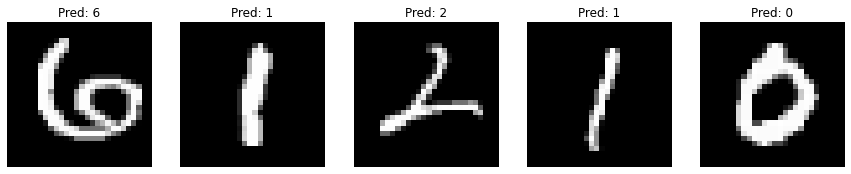

In [6]:

# Get one batch from test_loader as a validation set
dataiter = iter(test_loader)  # Create an iterator from test_loader to iterate over batches of data
val_images, val_labels = next(dataiter)  # Retrieve the next batch of images and the corresponding labels from the iterator

indices = np.random.choice(val_images.shape[0], 5, replace=False)  # Randomly select 5 unique indices from the batch (without replacement)
val_images5 = val_images[indices]  # Use the selected indices to extract 5 images from the validation images

# Get the model's predictions
model.eval()  # Set the model to evaluation mode, affecting layers like dropout or batch normalization
with torch.no_grad():  # Disable gradient computation since we are only doing inference (saves memory and computations)
    outputs = model(val_images5)  # Pass the selected images through the model to obtain output logits
    _, predictions = torch.max(outputs, 1)  # Compute the index of the maximum logit per image, which corresponds to the predicted class

# Plot the images with their predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Create a figure and a 1x5 grid of subplots with specified figure size
for i, ax in enumerate(axes):  # Iterate over each subplot axis and its corresponding index
    ax.imshow(val_images5[i].squeeze(), cmap='gray')  # Display the i-th image after squeezing extra dimensions; use grayscale colormap
    ax.set_title(f'Pred: {predictions[i].item()}')  # Set the title for this subplot to display the predicted label (convert tensor to value)
    ax.axis('off')  # Remove the axis ticks and labels for a cleaner image display
plt.show()  # Render and display the plot with the images and their predictions